In [ ]:
from pathlib import Path as pth
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv(pth('./Churn_Modelling.csv'))

In [ ]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train.isnull().sum()

NameError: ignored

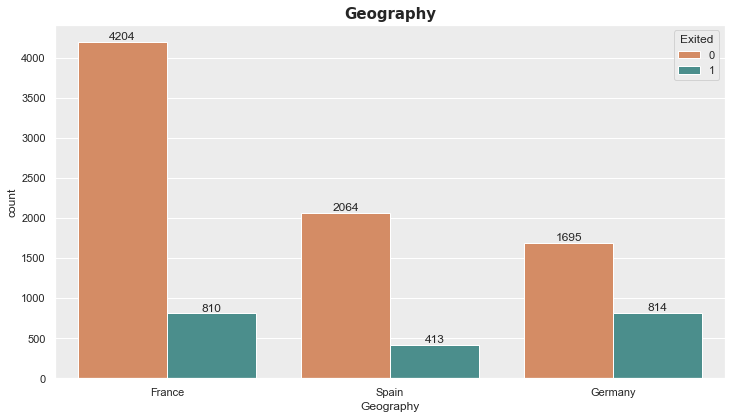

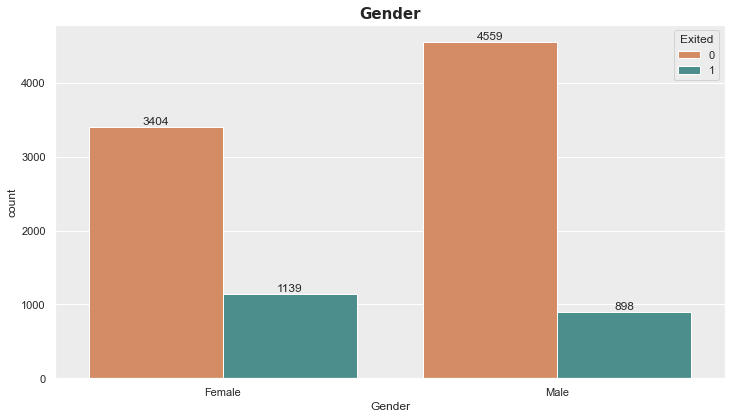

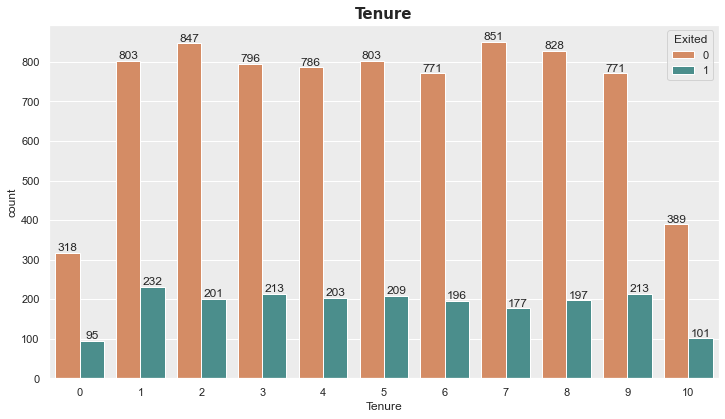

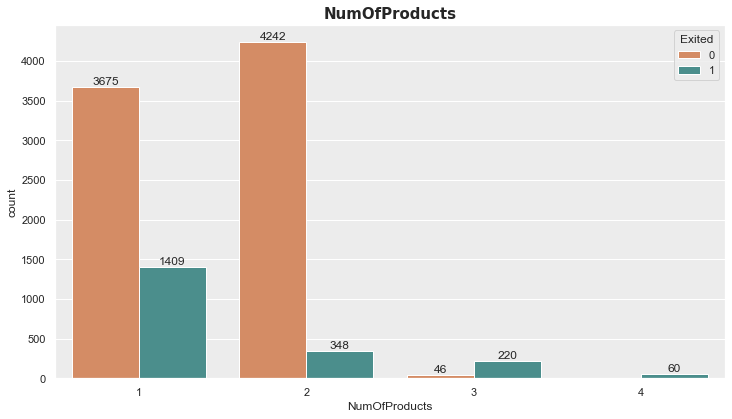

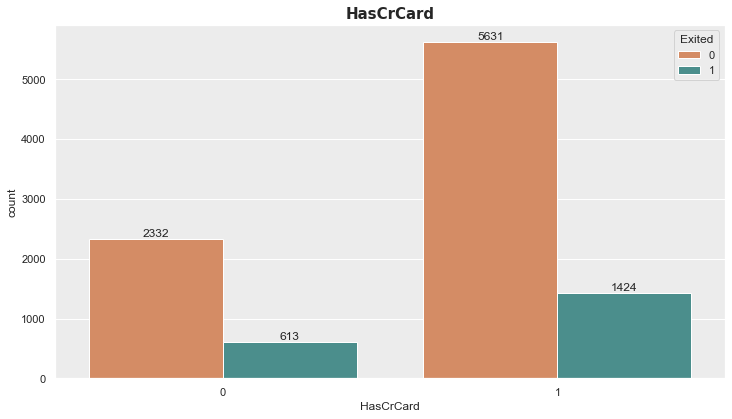

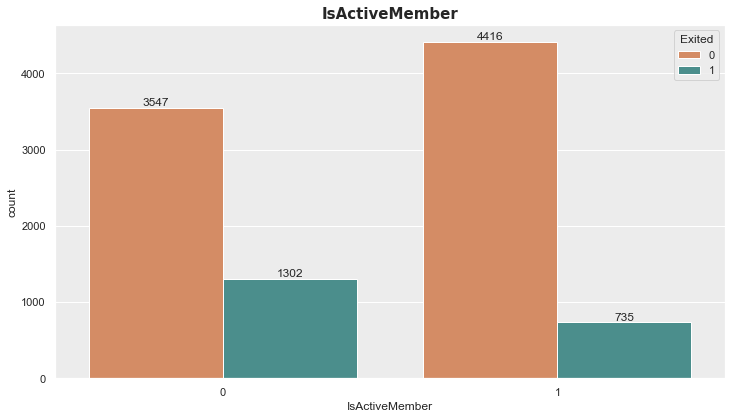

In [ ]:
list_of_cat_features = train[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(x = list_of_cat_features[feature], hue = 'Exited', data = train, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

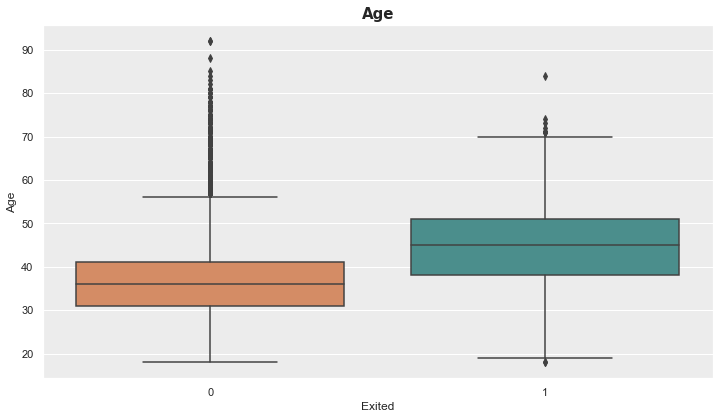

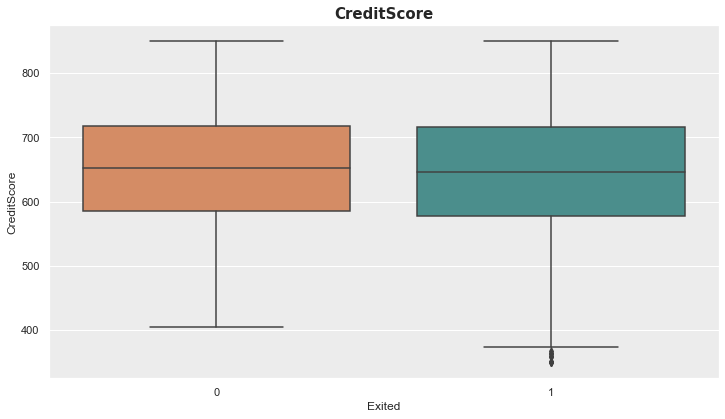

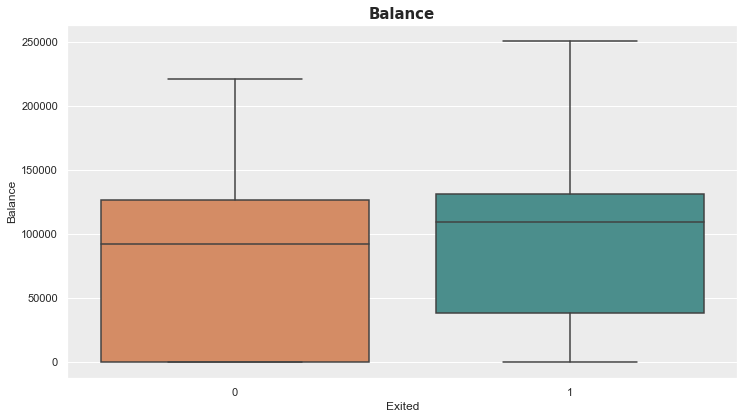

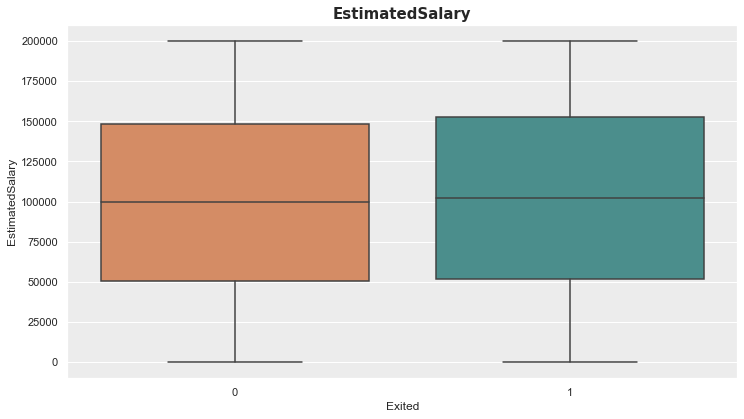

In [ ]:
list_of_num_features = train[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = train['Exited'], y = list_of_num_features[feature], data = train, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

**5.Handle the missing values**

In [ ]:
#Checking for missing values
train.isnull()

There are no null values in the dataset.

**6.Finding and replacing outliers.**

In [ ]:
#identifying the outliers
train.boxplot(column=['Age'], grid=False, color='black')

**7.Check categorical column and perform encoding**

In [ ]:
numeric=train[['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
categorical=train[['Surname','Geography','Gender']]

In [ ]:
categorical_encoded = pd.get_dummies(categorical, drop_first=True)
categorical_encoded.head()

In [ ]:
train2 = pd.concat([numeric,categorical_encoded], axis=1)
train2.head()

**8.Split the data into independent and dependent variables**

In [ ]:
x=train.iloc[:,1:7]
x1=train.iloc[:,10:]
x2=train.iloc[:,8]
x=pd.concat([x,x1,x2],axis=1)
y=pd.concat([train.iloc[:,7],train.iloc[:,9]],axis=1)

In [ ]:
#dependent variables
y

In [ ]:
#independent variables
x

**9.Scale the independent variables**

In [ ]:
train3=pd.DataFrame(x)
train3=train3.drop(['Surname','Geography','Gender'],axis=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train3)
scaled=ss.transform(df3)
scaled

**10.Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
print('X_train size: {},X_test size: {}'.format(x_train.shape,x_test.shape))

In [ ]:
print('Y_train size: {},Y_test size: {}'.format(y_train.shape,y_test.shape))